In [1]:
import pandas as pd
import numpy as np

data_path = "/Users/weitongxuedemacbookpro/Documents/本科毕业论文/"

In [2]:
df_train = pd.read_csv(data_path + "cirrhosis-data/train-Cirrhosis.csv").drop(["id"], axis=1)
df_test = pd.read_csv(data_path + "cirrhosis-data/test-Cirrhosis.csv")
df_supp = pd.read_csv(data_path + "cirrhosis-data/cirrhosis.csv")[df_train.columns]

df_train = pd.concat([df_train,df_supp]).reset_index(drop=True)


LABEL = "Status"
CAT_FEATS = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Stage"]
NUM_FEATS = [x for x in df_train if x not in CAT_FEATS and x != LABEL]
ORG_FEATS = df_train.drop(LABEL, axis=1).columns.tolist()


print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}\n")
df_train.head(10)

Train shape: (8323, 19)
Test shape: (5271, 19)



,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
5,703,D-penicillamine,19270,F,N,Y,N,N,0.6,227.0,3.46,34.0,6456.2,60.63,68.0,213.0,11.5,3.0,D
6,1300,Placebo,17703,F,N,N,N,N,1.0,328.0,3.35,43.0,1677.0,137.95,90.0,291.0,9.8,3.0,C
7,1615,Placebo,21281,F,N,Y,N,N,0.6,273.0,3.94,36.0,598.0,52.70,214.0,227.0,9.9,3.0,C
8,2050,D-penicillamine,20684,F,N,N,N,N,0.7,360.0,3.65,72.0,3196.0,94.55,154.0,269.0,9.8,2.0,C
9,2615,D-penicillamine,15009,F,N,N,N,N,0.9,478.0,3.60,39.0,1758.0,171.00,140.0,234.0,10.6,2.0,C


In [38]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8323 entries, 0 to 8322
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         8323 non-null   int64  
 1   Drug           8217 non-null   object 
 2   Age            8323 non-null   int64  
 3   Sex            8323 non-null   object 
 4   Ascites        8217 non-null   object 
 5   Hepatomegaly   8217 non-null   object 
 6   Spiders        8217 non-null   object 
 7   Edema          8323 non-null   object 
 8   Bilirubin      8323 non-null   float64
 9   Cholesterol    8189 non-null   float64
 10  Albumin        8323 non-null   float64
 11  Copper         8215 non-null   float64
 12  Alk_Phos       8217 non-null   float64
 13  SGOT           8217 non-null   float64
 14  Tryglicerides  8187 non-null   float64
 15  Platelets      8312 non-null   float64
 16  Prothrombin    8321 non-null   float64
 17  Stage          8317 non-null   float64
 18  Status  

(None, None)

# *EDA*

In [4]:
# pip install shap
import matplotlib.pyplot as plt
import seaborn as sns

Count of each Status:
C     5197
D     2826
CL     300
Name: Status, dtype: int64



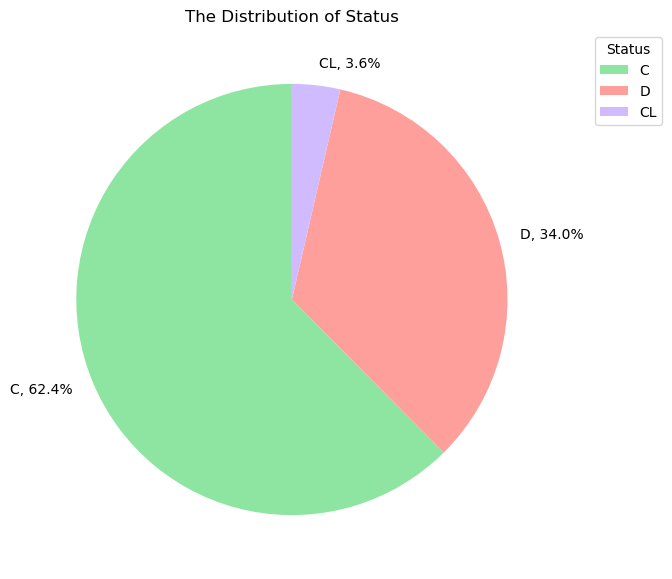

In [67]:
# STATUS

colors = sns.color_palette('pastel')[2:5]

status_counts = df_train[LABEL].value_counts()
labels = status_counts.index
sizes = status_counts.values

percentages = 100*sizes/sizes.sum()

print("Count of each Status:")
print(status_counts)
print()

plt.figure(figsize=(10, 7))
plt.pie(sizes, 
        labels=[f"{l}, {s:.1f}%" for l, s in zip(labels, percentages)], 
        startangle=90, 
        colors=colors)
plt.gca().set_aspect("equal")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1),labels=labels, title=LABEL)
plt.title(f"The Distribution of {LABEL}")
plt.show()

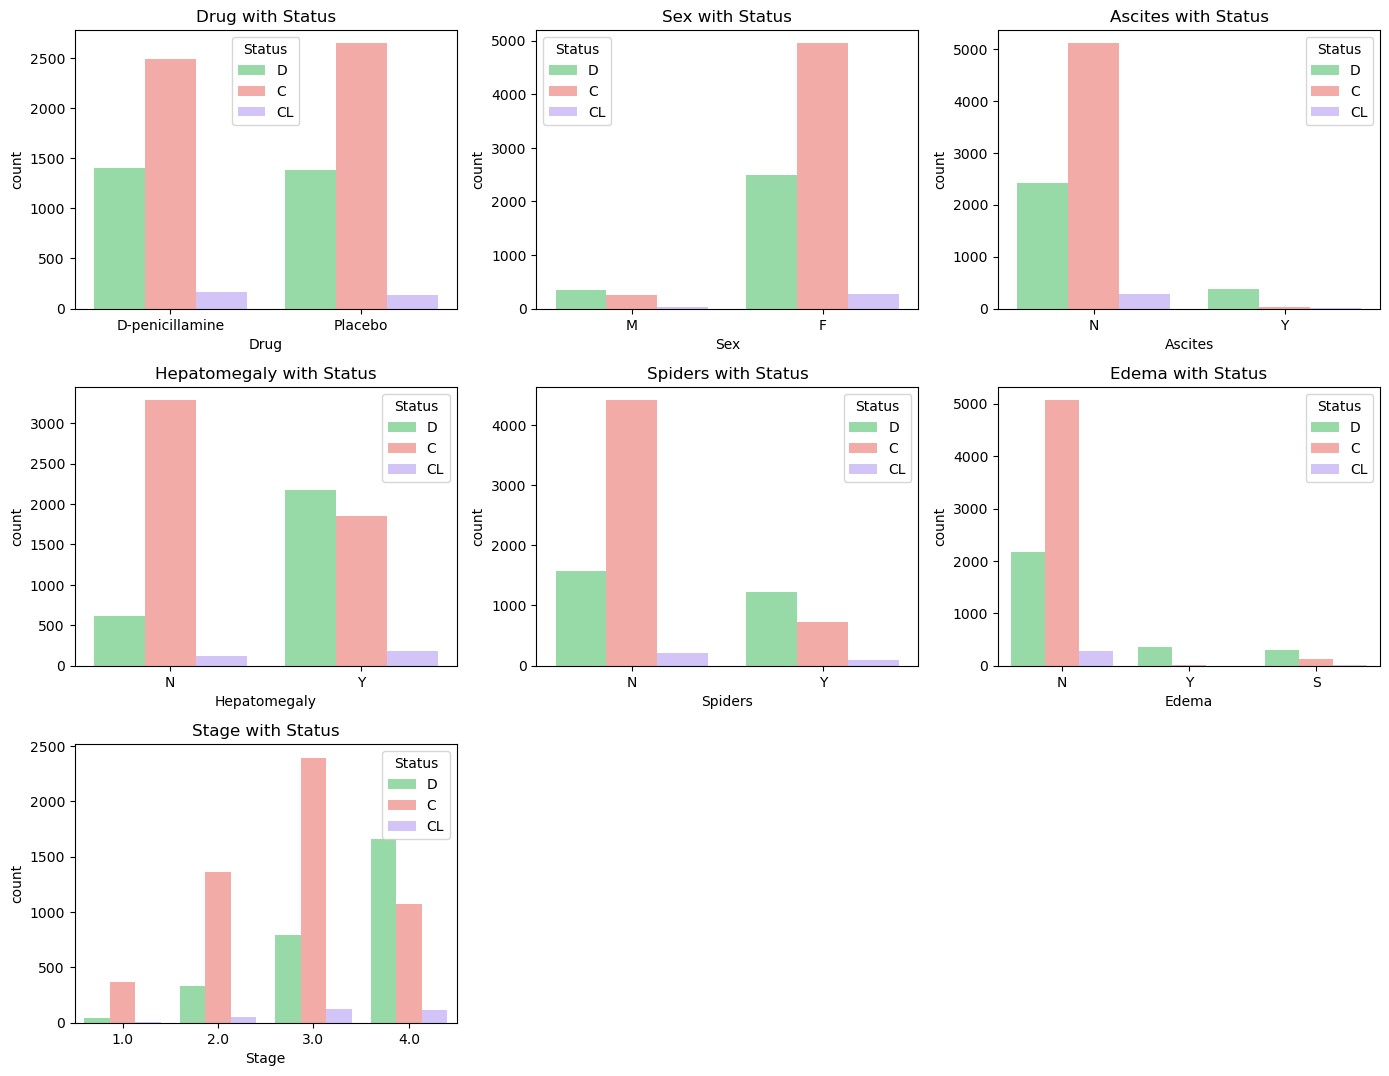

In [62]:
plt.figure(figsize=(14, len(CAT_FEATS) * 2))

for i, col in enumerate(CAT_FEATS):
    plt.subplot(len(CAT_FEATS) // 2 + 1, 3, i + 1)
    sns.countplot(x=col, hue=LABEL, data=df_train, palette=colors)
    plt.title(f"{col} with {LABEL}")
    plt.tight_layout()

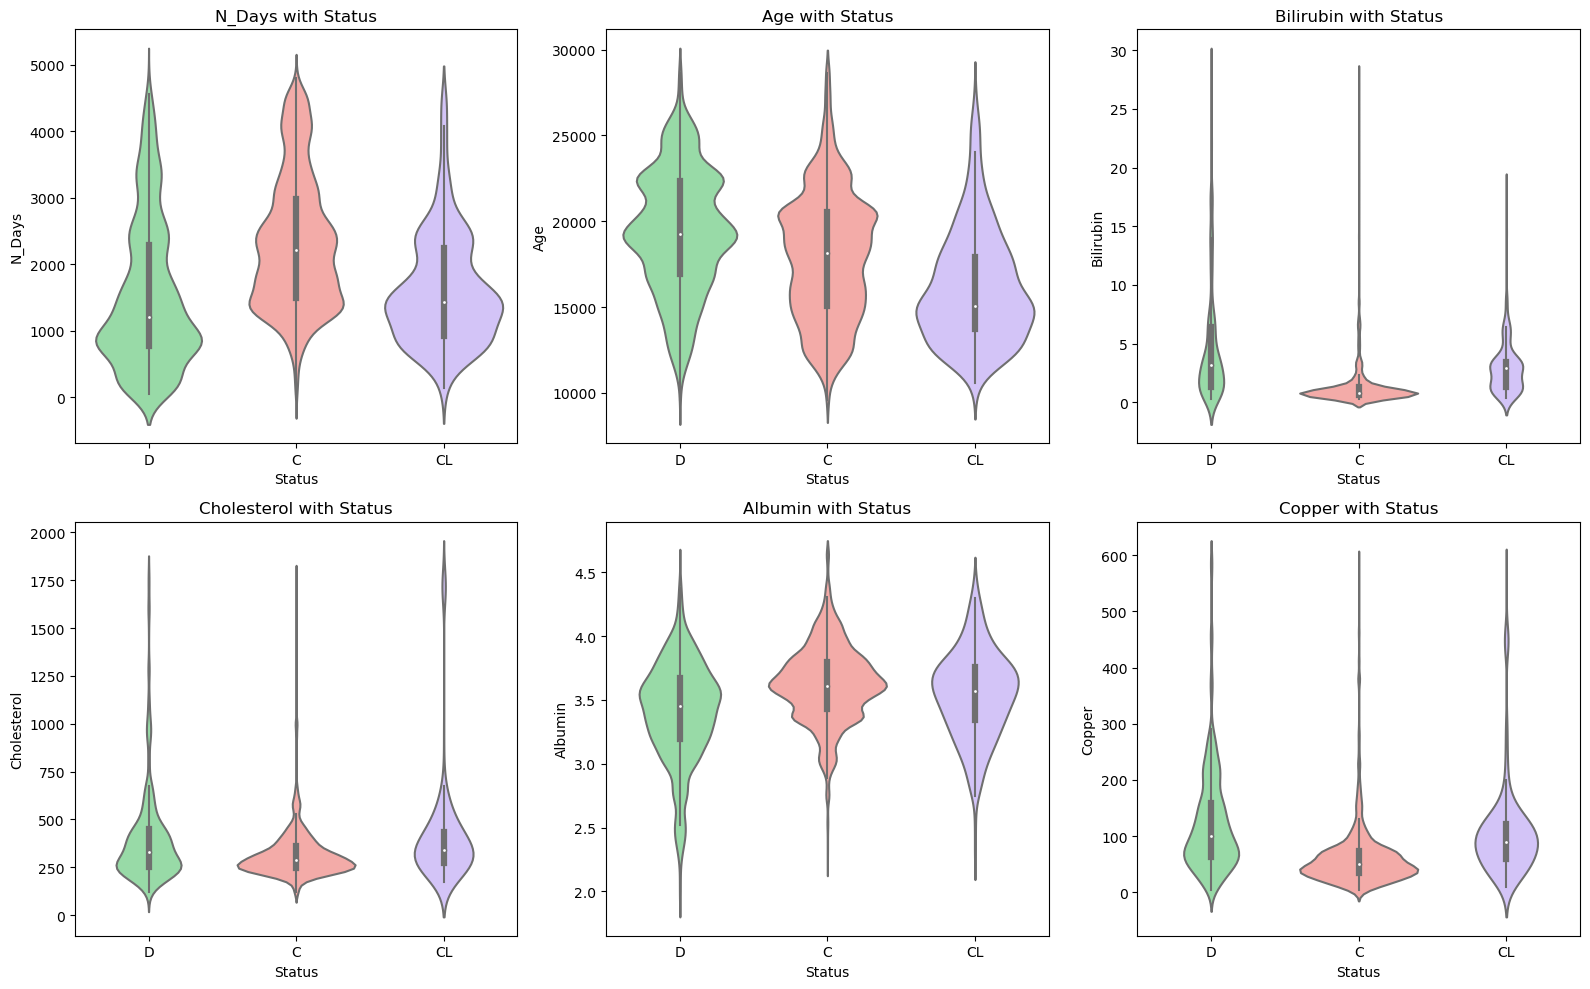

In [72]:
fig, axes = plt.subplots(2, 3, figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    sns.violinplot(x=LABEL, y=NUM_FEATS[i], data=df_train, ax=ax, palette=colors)
    ax.set_title(f"{NUM_FEATS[i]} with {LABEL}")
    
plt.tight_layout()
plt.show()

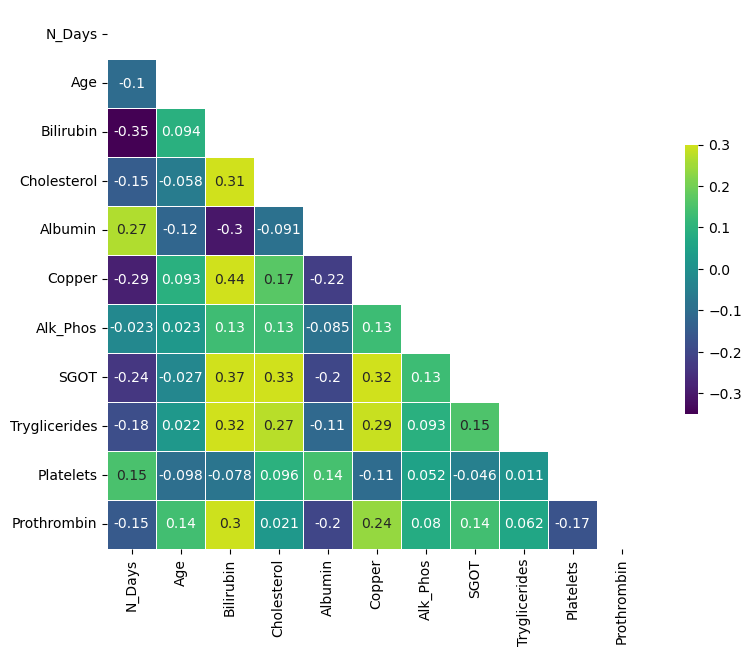

In [15]:
selected_features = [
    "N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin", "Copper", 
    "Alk_Phos", "SGOT", "Tryglicerides", "Platelets", "Prothrombin"
]

train_corr_matrix = df_train[selected_features].corr()

mask = np.triu(np.ones_like(train_corr_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(10,7))

sns.heatmap(train_corr_matrix,
            mask=mask,
            annot=True, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cmap='viridis',
            cbar_kws={"shrink": .5}
)

plt.show()

# *Feature Engineering*

### --Missing values imputing

In [85]:
df_train.isna().sum()

# df_train["Drug"].isna().sum()/ len(df_train["Drug"]), len(df_train["Drug"]), df_train["Drug"].isna().sum()

N_Days             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
Status             0
dtype: int64

In [87]:
df_train_mod = df_train.copy()
df_test_mod = df_test.copy()

print(f"Train shape: {df_train_mod.shape}")
print(f"Test shape: {df_test_mod.shape}")

Train shape: (8323, 19)
Test shape: (5271, 19)


In [89]:
missing_value_true = ["Drug", "Ascites", "Hepatomegaly", "Spiders", 
                      "Cholesterol", "Copper", "Alk_Phos", "SGOT",
                      "Tryglicerides", "Platelets", "Prothrombin", "Stage"]

most_missing_value_true = missing_value_true[:-3]
most_missing_value_true

df_train_mod.dropna(subset=["Drug", "Ascites", "Hepatomegaly", "Spiders", 
                      "Cholesterol", "Copper", "Alk_Phos", "SGOT",
                      "Tryglicerides"], how="all",inplace=True)

df_train_mod.dropna(subset=["Platelets"], how="all",inplace=True)

print(f"Train shape: {df_train_mod.shape}")
print(f"{df_train_mod.isna().sum()}")

Train shape: (8213, 19)
N_Days            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         0
Prothrombin       0
Stage             0
Status            0
dtype: int64


In [90]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

random_state = 42

df_cholesterol_missing = df_train_mod[df_train_mod["Cholesterol"].isna()]

target_cholesterol = "Cholesterol"
feat_cholesterol = ["Bilirubin", "SGOT"]

# set train and test split
cholesterol_X_train = df_train_mod[df_train_mod["Cholesterol"].notna() & 
                                   df_train_mod["SGOT"].notna()][feat_cholesterol]

cholesterol_X_test = df_cholesterol_missing[feat_cholesterol]

cholesterol_y_train = df_train_mod[df_train_mod["Cholesterol"].notna() & 
                                   df_train_mod["SGOT"].notna()][target_cholesterol]
# cholesterol_y_test = 

# fit the model
lm = LinearRegression()
lm.fit(X = cholesterol_X_train, y = cholesterol_y_train)
predict_cholesterol = lm.predict(cholesterol_X_test)

df_cholesterol_predict = pd.DataFrame(data=predict_cholesterol,
                                      columns=["Cholesterol"])

df_cholesterol_missing["Cholesterol"] = predict_cholesterol
df_cholesterol_missing["Cholesterol"] = df_cholesterol_missing["Cholesterol"].round(1)
df_cholesterol_missing

/var/folders/bl/ggtnn4196pz_6mzpn379bb7h0000gn/T/ipykernel_87975/331931425.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cholesterol_missing["Cholesterol"] = predict_cholesterol
/var/folders/bl/ggtnn4196pz_6mzpn379bb7h0000gn/T/ipykernel_87975/331931425.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cholesterol_missing["Cholesterol"] = df_cholesterol_missing["Cholesterol"].round(1)


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
7918,1217,Placebo,20535,M,Y,Y,N,Y,0.8,287.5,2.27,43.0,728.0,71.00,NaN,156.0,11.0,4.0,D
7944,4467,D-penicillamine,17046,F,N,N,N,N,1.3,326.3,3.34,105.0,11046.6,104.49,NaN,358.0,11.0,4.0,C
7945,1350,D-penicillamine,12285,F,N,Y,N,N,6.8,434.0,3.26,96.0,1215.0,151.90,NaN,226.0,11.7,4.0,D
7946,4453,Placebo,12307,F,N,Y,Y,N,2.1,287.6,3.54,122.0,8778.0,56.76,NaN,344.0,11.0,4.0,C
7949,4025,Placebo,15265,F,N,N,N,N,0.6,285.6,3.93,19.0,1826.0,71.30,NaN,474.0,10.9,2.0,C
7953,708,Placebo,22336,F,N,Y,N,N,0.8,314.0,3.82,58.0,678.0,97.65,NaN,233.0,11.0,4.0,D
7957,1000,D-penicillamine,24621,F,N,Y,N,N,2.6,293.1,3.10,94.0,6456.2,56.76,NaN,214.0,11.0,4.0,D
7974,3458,D-penicillamine,20600,F,N,N,N,N,0.6,268.6,4.64,20.0,666.0,54.25,NaN,265.0,10.6,2.0,C
7999,130,Placebo,16944,F,Y,Y,Y,Y,17.4,518.1,2.64,182.0,559.0,119.35,NaN,401.0,11.7,2.0,D
8000,3850,D-penicillamine,17841,F,N,N,N,N,1.0,317.8,3.70,33.0,1258.0,99.20,NaN,338.0,10.4,3.0,C


In [91]:
df_tryglicerides_missing = df_cholesterol_missing.copy()

target_tryglicerides = "Tryglicerides"
feat_tryglicerides = ["Bilirubin", "SGOT","Copper", "Cholesterol"]

# set train and test split
tryglicerides_X_train = df_train_mod[df_train_mod["Cholesterol"].notna() & 
                                     df_train_mod["SGOT"].notna() & 
                                     df_train_mod["Copper"].notna() &
                                     df_train_mod["Tryglicerides"].notna()][feat_tryglicerides]

tryglicerides_X_test = df_tryglicerides_missing[feat_tryglicerides]

tryglicerides_y_train = df_train_mod[df_train_mod["Cholesterol"].notna() & 
                                     df_train_mod["SGOT"].notna() & 
                                     df_train_mod["Copper"].notna() &
                                     df_train_mod["Tryglicerides"].notna()][target_tryglicerides]

# fit the model
rdf = RandomForestRegressor(random_state=42)
rdf.fit(X = tryglicerides_X_train, y = tryglicerides_y_train)
predict_tryglicerides = rdf.predict(tryglicerides_X_test)


df_tryglicerides_predict = pd.DataFrame(data=predict_tryglicerides,
                                      columns=["Cholesterol"])

df_tryglicerides_missing["Tryglicerides"] = predict_tryglicerides
df_tryglicerides_missing["Tryglicerides"] = df_tryglicerides_missing["Tryglicerides"].round(1)
df_tryglicerides_missing

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
7918,1217,Placebo,20535,M,Y,Y,N,Y,0.8,287.5,2.27,43.0,728.0,71.00,125.9,156.0,11.0,4.0,D
7944,4467,D-penicillamine,17046,F,N,N,N,N,1.3,326.3,3.34,105.0,11046.6,104.49,134.0,358.0,11.0,4.0,C
7945,1350,D-penicillamine,12285,F,N,Y,N,N,6.8,434.0,3.26,96.0,1215.0,151.90,127.2,226.0,11.7,4.0,D
7946,4453,Placebo,12307,F,N,Y,Y,N,2.1,287.6,3.54,122.0,8778.0,56.76,142.4,344.0,11.0,4.0,C
7949,4025,Placebo,15265,F,N,N,N,N,0.6,285.6,3.93,19.0,1826.0,71.30,86.7,474.0,10.9,2.0,C
7953,708,Placebo,22336,F,N,Y,N,N,0.8,314.0,3.82,58.0,678.0,97.65,125.3,233.0,11.0,4.0,D
7957,1000,D-penicillamine,24621,F,N,Y,N,N,2.6,293.1,3.10,94.0,6456.2,56.76,135.0,214.0,11.0,4.0,D
7974,3458,D-penicillamine,20600,F,N,N,N,N,0.6,268.6,4.64,20.0,666.0,54.25,92.4,265.0,10.6,2.0,C
7999,130,Placebo,16944,F,Y,Y,Y,Y,17.4,518.1,2.64,182.0,559.0,119.35,126.4,401.0,11.7,2.0,D
8000,3850,D-penicillamine,17841,F,N,N,N,N,1.0,317.8,3.70,33.0,1258.0,99.20,116.4,338.0,10.4,3.0,C


In [94]:
df_train_mod = df_train_mod.fillna(df_tryglicerides_missing)
df_train_mod.dropna(inplace=True)
df_train_mod.isna().sum(), print(f"Train shape: {df_train_mod.shape}")z

Train shape: (8209, 19)


(N_Days           0
 Drug             0
 Age              0
 Sex              0
 Ascites          0
 Hepatomegaly     0
 Spiders          0
 Edema            0
 Bilirubin        0
 Cholesterol      0
 Albumin          0
 Copper           0
 Alk_Phos         0
 SGOT             0
 Tryglicerides    0
 Platelets        0
 Prothrombin      0
 Stage            0
 Status           0
 dtype: int64,
 None)

### --Label encoding

In [98]:
df_train_mod

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,1153,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0,C
8213,994,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0,C
8214,939,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0,C
8215,839,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0,C
